### Linear Regression

This is to implement the linear regression with PyTorch. Linear regression is just with: y = w * x + b.As I write the code, I use SGD as optimizer with learning rate with 1,I get **nan loss**, how is that possible? This is caused by exploding vanish problem: [Why training deep learning difficult?](http://neuralnetworksanddeeplearning.com/chap5.html), so I just choose more advance optimizer with Adam, in fact, with Adam we don't need to set learning rate as it is a self-adapt solution, but I also change the default learning rate I find that it's more efficient!

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from matplotlib import style
import tempfile
import os
import shutil

style.use('ggplot')

In [2]:
# hyper-parameters
input_size = 13
output_size = 1
epochs = 300
learning_rate = .01

In [3]:
class LinearNet(nn.Module):
    def __init__(self):
        super(LinearNet, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
        # as features is 13D also we need to keep the bias
        # the output is just 1D with regression prediction

    def forward(self, x):
        x = x.float()
        x = self.fc(x)
        return x

In [4]:
# Make dataset
# here I just load boston data from sklearn for linear regression
x, y = load_boston(return_X_y=True)
y = y.reshape(-1, 1)

# we should split data to train and test
train_position = int(len(x) * .9)
xtrain = x[:train_position]
ytrain = y[:train_position]
xtest = x[train_position:]
ytest = y[train_position:]

# we should convert data to Tensor
xtrain = torch.from_numpy(xtrain)
xtest = torch.from_numpy(xtest)

# have to convert the target to float type
ytrain = torch.from_numpy(ytrain).view(-1, 1).float()
ytest = torch.from_numpy(ytest).view(-1, 1).float()

In [5]:
# after load data, we should create our model
model = LinearNet()
print("Model Structure: ", model)

Model Structure:  LinearNet(
  (fc): Linear(in_features=13, out_features=1, bias=True)
)


In [6]:
# we should create the optimizer and loss function
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

In [7]:
# to store training loss and test loss
train_loss_list = []
test_loss_list = []

In [8]:
# start training epochs
for epoch in range(epochs):
    # get the prediction on train data
    out = model(xtrain)

    # get the loss based on train data
    loss = criterion(out, ytrain)

    # backward step to get the gradient
    optimizer.zero_grad()
    loss.backward()

    # update the model parameters
    optimizer.step()

    # make the test loss based on updated parameters
    # we don't need the gradient for test data
    with torch.no_grad():
        out_test = model(xtest)
        loss_test = criterion(out_test, ytest)

    train_loss_list.append(loss)
    test_loss_list.append(loss_test)

    if epoch % 10 == 0:
        print("[Epoch: %d, train loss: %.2f, test loss: %.2f]" %
              (epoch, loss.item(), loss_test.item()))

[Epoch: 0, train loss: 1671.98, test loss: 1561.54]
[Epoch: 10, train loss: 379.62, test loss: 405.67]
[Epoch: 20, train loss: 145.88, test loss: 194.82]
[Epoch: 30, train loss: 84.86, test loss: 64.24]
[Epoch: 40, train loss: 77.00, test loss: 51.92]
[Epoch: 50, train loss: 75.03, test loss: 45.17]
[Epoch: 60, train loss: 72.95, test loss: 42.49]
[Epoch: 70, train loss: 70.95, test loss: 40.36]
[Epoch: 80, train loss: 69.13, test loss: 38.46]
[Epoch: 90, train loss: 67.44, test loss: 37.71]
[Epoch: 100, train loss: 65.87, test loss: 36.02]
[Epoch: 110, train loss: 64.40, test loss: 35.89]
[Epoch: 120, train loss: 63.05, test loss: 34.73]
[Epoch: 130, train loss: 61.80, test loss: 34.45]
[Epoch: 140, train loss: 60.65, test loss: 34.03]
[Epoch: 150, train loss: 59.58, test loss: 33.60]
[Epoch: 160, train loss: 58.60, test loss: 33.43]
[Epoch: 170, train loss: 57.69, test loss: 33.19]
[Epoch: 180, train loss: 56.84, test loss: 32.99]
[Epoch: 190, train loss: 56.04, test loss: 32.85]
[Ep

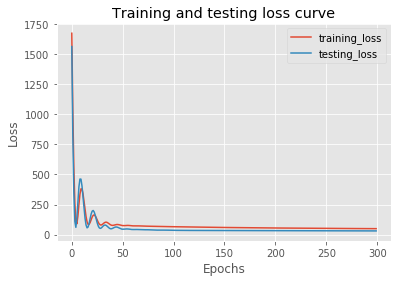

In [9]:
# then we could plot the train and test data loss curve
plt.plot(range(len(train_loss_list)), train_loss_list, label='training_loss')
plt.plot(range(len(test_loss_list)), test_loss_list, label='testing_loss')

plt.title("Training and testing loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

plt.show()

# as you could see that we don't find the training and testing loss decrease, that's a good news

In [10]:
# we could save our trained model checkpoint to disk, here I just save
# it to a temperate folder, you could just change the path you want
tmp_path = tempfile.mkdtemp()
torch.save(model.state_dict(), os.path.join(tmp_path, 'model.ckpt'))
print("Get model:", os.listdir(tmp_path))
# remove the temperate folder
shutil.rmtree(tmp_path)

Get model: ['model.ckpt']
